In [1]:
"""
We use a simpler function to solve the complex ODE and affirm that our function is working. 
In this specific problem, the real values should resemble a cosine function, since we want to calculate
Euler's equation. 
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import complex_ode

In [2]:
class FuncObj(object):
    def __init__(self, f, farg):
        self._ode_ham = f
        self.farg=farg

    def f(self, t, y):
        return self._ode_ham(t, y, self.farg)
    
    def set_arg(self, farg):
        self.farg = farg
        return
    def print_fargs(self):
        print("fargs:", self.farg)
        print("fargs.shape: ", self.farg.shape)
        return

In [3]:
#(e_1)t = t
#(e_2)t = -t
#H_t:
t = np.linspace(0,20,1000)
#t = t.reshape((t.shape[0],1))
H = np.array([[1,0],[0,-2]])
psi_0 = np.array([[1],[1]])
psi_0 = psi_0.reshape((psi_0.shape[0],))
dt = t[1]-t[0]
print("dt is = ", dt)
#print(t.shape[0]/dt)

#Right hand side of the function; complex
def simple_ode(t, coeff, H):
    #print("H*t = ", t*H)
    #print("time: ",t)
    c_list = -1j*np.dot(H, coeff)
    #print("coeff: ",coeff)
    #print("Final value: ", c_list)
    return c_list


obj = FuncObj(simple_ode, H)
comp = complex_ode(obj.f)
comp.set_integrator("dop853")
comp.set_initial_value(psi_0,t[0])



psi_t = np.empty((psi_0.shape[0],t.shape[0]))
for time in range(t.shape[0]):
    #print("At time t=", time)
    #obj.set_arg(H)
    comp.integrate(comp.t+dt)
    psi_f = comp.y
    #print("psi f: ",psi_f)
    psi_t[:,time] = psi_f.copy()
    #print(psi_t[:,time])

dt is =  0.02002002002002002


<ipython-input-3-ebd9d9f1cf2c>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_t[:,time] = psi_f.copy()


(2, 1000)


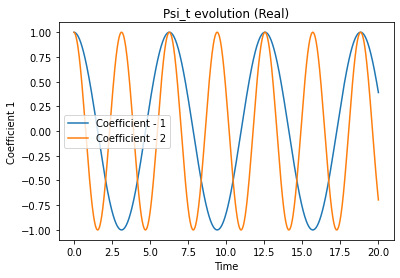

In [4]:
print(psi_t.shape)


plt.plot(t,psi_t[0,:].real, label = "Coefficient - 1")
plt.plot(t,psi_t[1,:].real, label = "Coefficient - 2")
plt.xlabel("Time")
plt.ylabel("Coefficient 1")
plt.title("Psi_t evolution (Real)")
plt.legend()
plt.show()

In [5]:
psi_final = psi_t[:,t.shape[0]-1]
print("psi_t.shape: ",psi_t.shape)
print("psi_f: ", psi_final)

print(np.dot(psi_final.T,np.dot(H, psi_final)))


eig_v, eig_s = np.linalg.eig(H)
print(eig_v)
print(eig_s)

psi_t.shape:  (2, 1000)
psi_f:  [ 0.38972432 -0.6962299 ]
-0.8175871090503398
[ 1. -2.]
[[1. 0.]
 [0. 1.]]
